In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
from pandas import Timedelta
init_notebook_mode(connected=True)
t=pd.read_csv(r"D:\llm\Minor Project Data set (Stock Price Prediction).csv")
t.info()
print(t.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Vol

In [5]:
pip install chart_studio

  Using cached chart_studio-1.1.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


Dataframe contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00
Total days: 1460
                                Date         Open         High          Low  \
count                           1009  1009.000000  1009.000000  1009.000000   
mean   2020-02-05 07:30:58.870168320   419.059673   425.320703   412.374044   
min              2018-02-05 00:00:00   233.919998   250.649994   231.229996   
25%              2019-02-06 00:00:00   331.489990   336.299988   326.000000   
50%              2020-02-06 00:00:00   377.769989   383.010010   370.880005   
75%              2021-02-05 00:00:00   509.130005   515.630005   502.529999   
max              2022-02-04 00:00:00   692.349976   700.989990   686.090027   
std                              NaN   108.537532   109.262960   107.555867   

             Close    Adj Close        Volume  
count  1009.000000  1009.000000  1.009000e+03  
mean    419.000733   419.000733  7.570685e+06  
min     233.880005   233.880005  1.144000e+06  

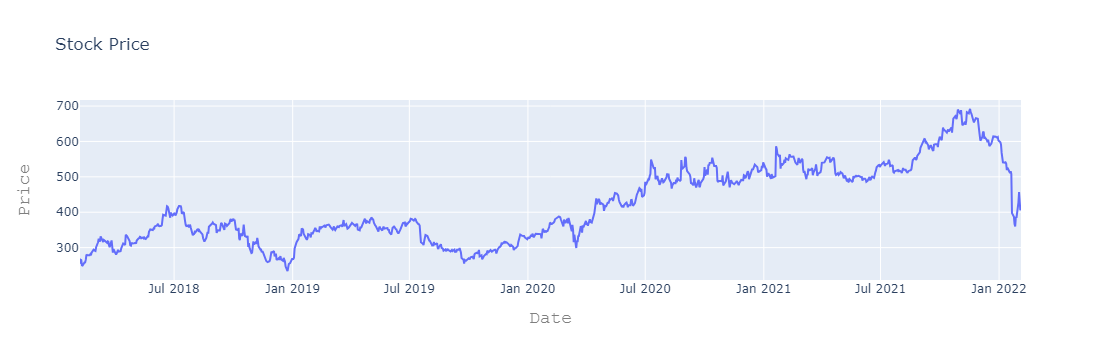

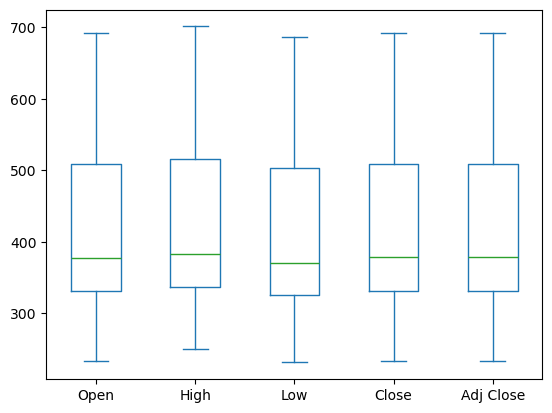

In [24]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

# Assuming 't' is your DataFrame containing stock prices

t['Date'] = pd.to_datetime(t['Date'])
print(f'Dataframe contains stock prices between {t.Date.min()} {t.Date.max()}')
total_days = (t.Date.max() - t.Date.min()).days
print(f'Total days: {total_days}')
print(t.describe())

t[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

layout = go.Layout(
    title='Stock Price',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

t_data = [{'x': np.array(t['Date']), 'y': t['Close']}]
plot = go.Figure(data=t_data, layout=layout)
iplot(plot)



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [26]:
X=np.array(t.index).reshape(-1,1)
Y=t['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [27]:
scaler=StandardScaler().fit(X_train)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

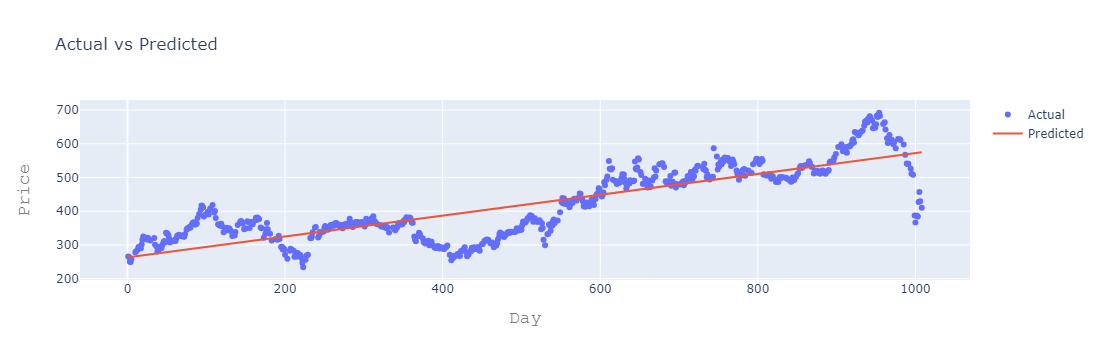

In [30]:
import plotly.graph_objs as go
from plotly.offline import iplot
import numpy as np

trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode="markers",
    name="Actual"
)

trace1 = go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode="lines",
    name="Predicted"
)

layout = go.Layout(
    title='Actual vs Predicted',
    xaxis=dict(
        title='Day',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot2 = go.Figure(data=[trace0, trace1], layout=layout)

iplot(plot2)


In [31]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944174	0.7261648669848495
MSE       3403.0038800025172	3460.988580958064

